<a href="https://colab.research.google.com/github/2303a51765Vivek/AIML-2025/blob/main/Copy_of_AIML_lab_Exam_1771.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prediction of national poll on health aging

Q1 Identify the top 5reasons for health aging?

Q2 Name the community which has highest aging issues?

Q3 Identify the gender which has the most aging and least aging issues?

Q4 Does Age, employement and mental stress contribute to health aging?

Q5 Name the category which visited most number of doctors?

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
data = {
    'Community': ['Urban', 'Rural', 'Suburban', 'Urban', 'Rural', 'Suburban', 'Urban', 'Rural'],
    'Age': [45, 60, 35, 55, 62, 40, 70, 68],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Employment': ['Employed', 'Unemployed', 'Employed', 'Employed', 'Unemployed', 'Employed', 'Unemployed', 'Employed'],
    'Mental_Stress_Level': [6, 7, 5, 8, 7, 6, 9, 8],  # 1-10 scale of mental stress
    'Doctor_Visits': [5, 3, 6, 8, 2, 4, 7, 3],  # Number of doctor visits
    'Health_Aging_Issues': [1, 2, 1, 3, 2, 1, 4, 3]  # Scale from 1 (least) to 5 (most)
}


In [ ]:
df = pd.DataFrame(data)

Top reasons for health aging:
Age                    54.375
Mental_Stress_Level     7.000
Doctor_Visits           4.750
dtype: float64

Community with highest aging issues:
Community
Urban    2.666667
Name: Health_Aging_Issues, dtype: float64

Gender with most aging issues:
Gender
Female    2.25
Name: Health_Aging_Issues, dtype: float64

Gender with least aging issues:
Gender
Male    2.0
Name: Health_Aging_Issues, dtype: float64

Correlation matrix showing contribution of Age, Employment, and Mental Stress to Health Aging:
                          Age  Employment_Numeric  Mental_Stress_Level  \
Age                  1.000000           -0.611323             0.903821   
Employment_Numeric  -0.611323            1.000000            -0.421637   
Mental_Stress_Level  0.903821           -0.421637             1.000000   
Health_Aging_Issues  0.862425           -0.398353             0.969003   

                     Health_Aging_Issues  
Age                             0.862425  
Employment_Num

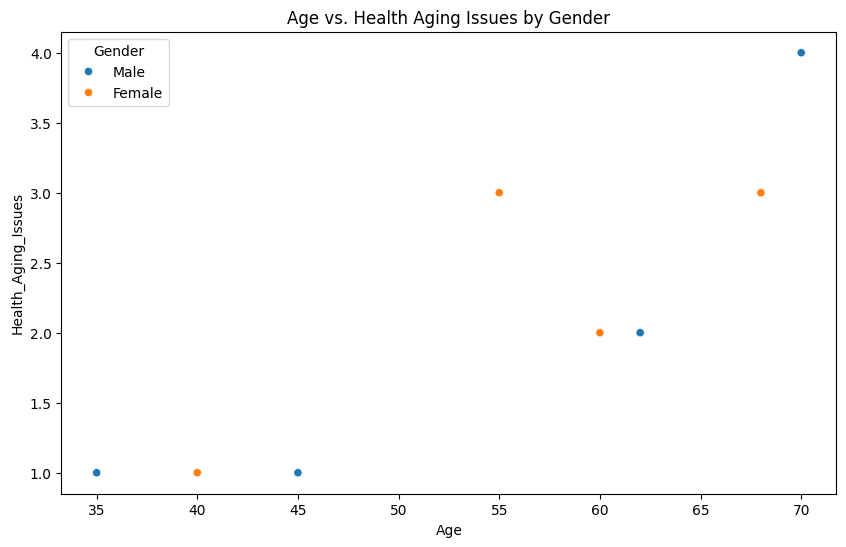

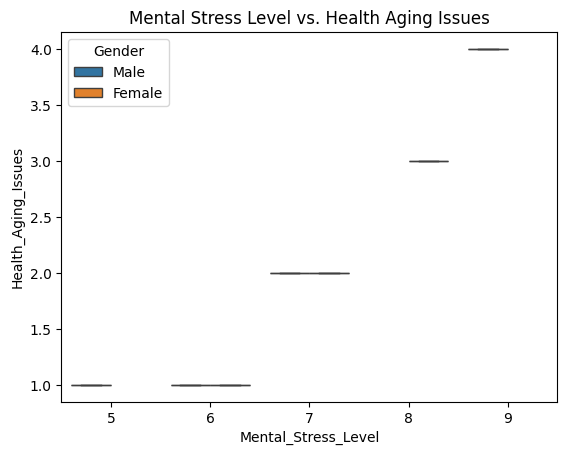

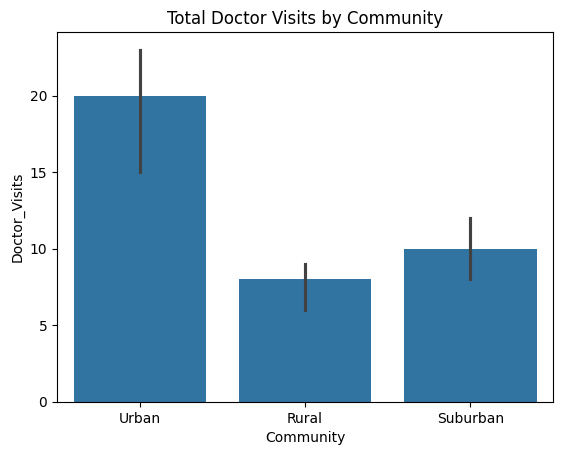

In [ ]:
# Q1: Identify the top 5 reasons for health aging (dummy data, adjust as per real data)
# Here, 'Health_Aging_Issues' will represent the severity of aging-related issues
# and 'Mental_Stress_Level' might be a contributing factor, as well as 'Age', etc.
reasons = df[['Age', 'Mental_Stress_Level',  'Doctor_Visits']].mean().sort_values(ascending=False)
print("Top reasons for health aging:")
print(reasons)

# Q2: Name the community which has highest aging issues
community_issues = df.groupby('Community')['Health_Aging_Issues'].mean().sort_values(ascending=False)
print("\nCommunity with highest aging issues:")
print(community_issues.head(1))

# Q3: Identify the gender which has the most aging and least aging issues
gender_issues = df.groupby('Gender')['Health_Aging_Issues'].mean().sort_values(ascending=False)
print("\nGender with most aging issues:")
print(gender_issues.head(1))
print("\nGender with least aging issues:")
print(gender_issues.tail(1))

# Q4: Does Age, Employment, and Mental Stress contribute to health aging?

# First, we need to encode 'Employment' as a numeric value
df['Employment_Numeric'] = df['Employment'].map({'Unemployed': 0, 'Employed': 1})

# Now, we calculate the correlation matrix including the encoded 'Employment_Numeric'
correlations = df[['Age', 'Employment_Numeric', 'Mental_Stress_Level', 'Health_Aging_Issues']].corr()

# Output the correlation matrix
print("\nCorrelation matrix showing contribution of Age, Employment, and Mental Stress to Health Aging:")
print(correlations)


# Q5: Name the category which visited the most number of doctors
doctor_visits_category = df.groupby('Community')['Doctor_Visits'].sum().sort_values(ascending=False)
print("\nCategory with most doctor visits:")
print(doctor_visits_category.head(1))

# Visualize the data using Seaborn
plt.figure(figsize=(10, 6))

# Visualize the relationship between Age and Health Aging Issues
sns.scatterplot(data=df, x='Age', y='Health_Aging_Issues', hue='Gender')
plt.title('Age vs. Health Aging Issues by Gender')
plt.show()

# Visualize the impact of Mental Stress on Health Aging Issues
sns.boxplot(data=df, x='Mental_Stress_Level', y='Health_Aging_Issues', hue='Gender')
plt.title('Mental Stress Level vs. Health Aging Issues')
plt.show()

# Visualization of Doctor Visits by Community
sns.barplot(data=df, x='Community', y='Doctor_Visits', estimator='sum')
plt.title('Total Doctor Visits by Community')
plt.show()